# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls

drive  sample_data


## Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Project 05/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Project 05/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [5]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [6]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other? **the difference is in type of plant, picture quality, background, orientation, zoom, blur and color as well.**
2. Is the dataset provided an imbalance? (Check with using bar plots). **Yes, there is an imbalance among the different categories.**

In [7]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

### Plotting random images from each of the class

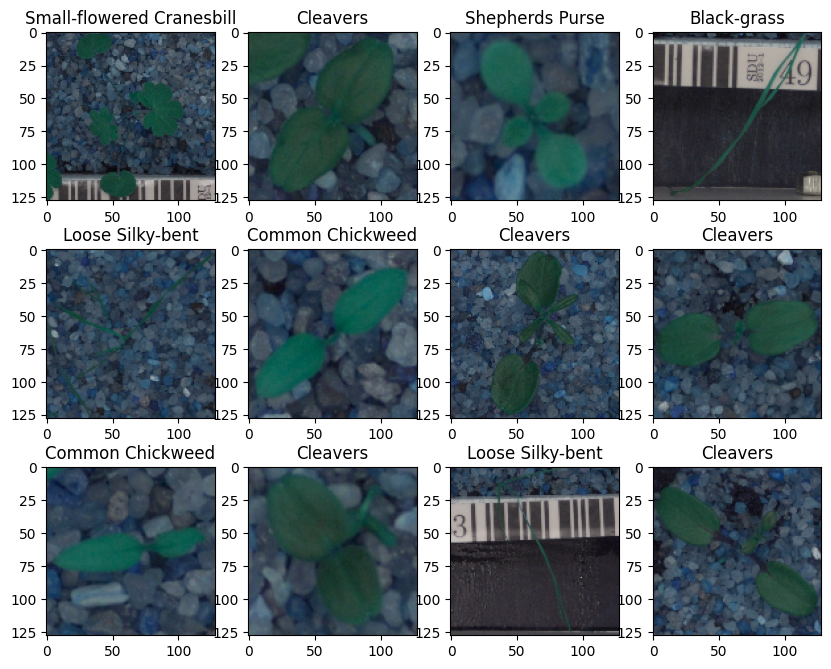

In [8]:
plot_images(images,labels)

**Observation:** randomly selected pictures show different plants type labeled by different categories.

* All pictures are colorful and sized in 125*125 pixels.


### Checking the distribution of the target variable

In [9]:
# Getting all unique different categories into a list
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)
num_categ

12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

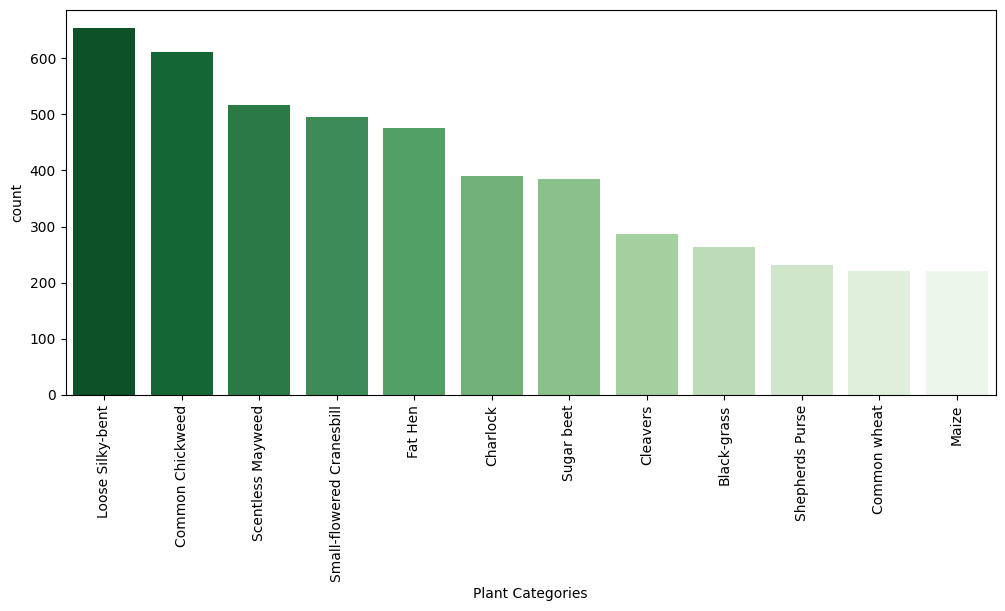

In [10]:
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=labels.iloc[:,-1],order = labels['Label'].value_counts().index, palette='Greens_r')
plt.xlabel('Plant Categories')
plt.xticks(rotation=90)

**Observation:** The target variable (Label) is pretty imbalance.
* The lowest count goes for the Maize label.
* and the highest for Loose Silky-bent.
* Total number of plant categories are 12 ie., o/p preds should be 12
* We have a total of 4750 plant images
* Each image is of shape 128 X 128
* As the number of channels is 3, images are in RGB (Red, Blue, Green)

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [11]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)   # BGR to RGB images

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [12]:
# Resizing images to 64 by 64
images_decreased = [cv2.resize(image, None,fx=0.50,fy=0.50, interpolation=cv2.INTER_LINEAR) for image in images] # use of resize function in cv2 library, 50% size reduction applied

**Image before resizing**

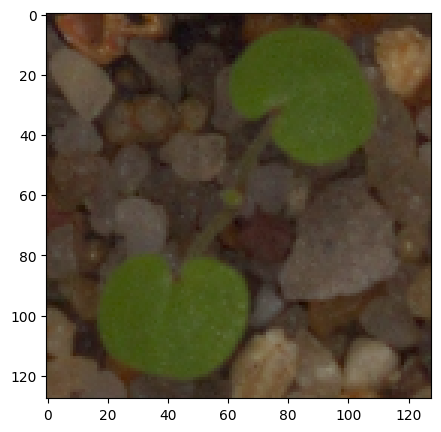

In [13]:
plt.imshow(images[5]) # plot image number 5

**Image after resizing**

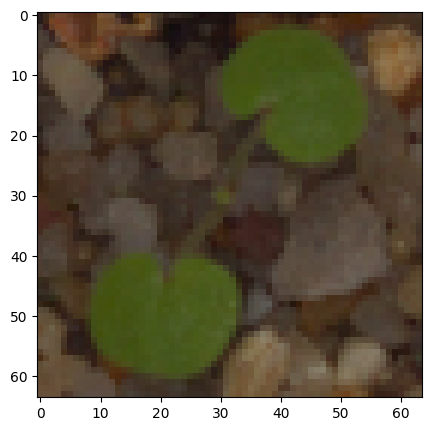

In [14]:
plt.imshow(images_decreased[5]) # plot image number 5

**Observation:** Resolution has dropped after resizing.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [15]:
# Splitting into test set first
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)

# Splitting the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp, test_size=0.1, random_state=42,stratify=y_temp)

In [16]:
# Testing the data split process
print('test data percent = %',100*len(y_test)/len(labels))
print('train data percent = %',100*len(y_train)/len(labels))
print('validation data percent = %',100*len(y_val)/len(labels))

test data percent = % 10.0
train data percent = % 80.98947368421052
validation data percent = % 9.010526315789473


In [17]:
# Check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


**Observation:**

* X_train has 3847 plant images
* X_val has 428 plant images
* X_test has 475 plant images
* Plan images are in 64X64 shape with color channel

### Encode the target labels

In [18]:
# Initialize LabelBinarizer
enc = LabelBinarizer()

# Fit and transform y_train
y_train_encoded = enc.fit_transform(y_train)

# Transform y_val
y_val_encoded = enc.transform(y_val)

# Transform y_test
y_test_encoded = enc.transform(y_test)


In [19]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

**Reshaping data into shapes compatible with Keras models**



In [20]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

**Scaling pixel value by 255 to standardize the images to have values between 0-1**



In [21]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [22]:
# Clearing backend
backend.clear_session()

In [23]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
# Initializing a sequential model
model1 = Sequential()

# Adding the first convolutional layer with 128 filters, kernel size 3x3, activation 'relu', and padding 'same'
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first convolutional layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Creating two similar convolutional and max-pooling layers with activation 'relu'
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of the convolutional layer after max pooling
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons and activation 'relu'
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation 'softmax' for multi-class classification
model1.add(Dense(12, activation='softmax'))

# Using the Adam Optimizer
opt = Adam()

# Compiling the model using suitable metric for loss function
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

**Observation:**
* The model is a Sequential model with a linear stack of layers.
* It starts with a convolutional layer (Conv2D) with 128 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.
* MaxPooling2D layer follows, reducing the spatial dimensions by a factor of 2.
* Two more Conv2D and MaxPooling2D layers are added, progressively reducing the spatial dimensions.
* The Flatten layer converts the 3D output to a 1D array, preparing it for dense connections.
* A Dense layer with 16 neurons and 'relu' activation is added, followed by a * Dropout layer with a dropout rate of 0.3.
* The output layer is a Dense layer with 12 neurons (assuming a multi-class classification problem) and 'softmax' activation.
* The model uses the Adam optimizer.
* The compiled model uses categorical cross-entropy as the loss function and accuracy as the metric.
* The total number of parameters in the model is 128,828, and all of them are trainable.

**Fitting the model on the train data**

In [25]:
# Fitting the model on the training data and using validation data for validation
history_1 = model1.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
121/121 - 14s - loss: 2.4518 - accuracy: 0.1139 - val_loss: 2.4343 - val_accuracy: 0.1285 - 14s/epoch - 113ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3153 - accuracy: 0.2137 - val_loss: 2.0510 - val_accuracy: 0.3645 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0494 - accuracy: 0.3000 - val_loss: 1.8424 - val_accuracy: 0.3879 - 1s/epoch - 9ms/step
Epoch 4/30
121/121 - 1s - loss: 1.9019 - accuracy: 0.3314 - val_loss: 1.7025 - val_accuracy: 0.4393 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7962 - accuracy: 0.3478 - val_loss: 1.6175 - val_accuracy: 0.4486 - 1s/epoch - 10ms/step
Epoch 6/30
121/121 - 1s - loss: 1.7065 - accuracy: 0.3832 - val_loss: 1.4643 - val_accuracy: 0.5023 - 1s/epoch - 11ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6528 - accuracy: 0.3845 - val_loss: 1.3935 - val_accuracy: 0.5350 - 1s/epoch - 11ms/step
Epoch 8/30
121/121 - 1s - loss: 1.5880 - accuracy: 0.4073 - val_loss: 1.2745 - val_accuracy: 0.5631 - 1s/epoch - 10ms/step
Epoch 9/30
121/1

**Observations:**


**In a nutshell:**
* The model starts with low accuracy and high loss, gradually improving over epochs.
* Training and validation accuracy increase, indicating learning.
* Training and validation loss decrease, showing improved model convergence.
* Validation accuracy reaches 66.82% by the 30th epoch.
* The time per epoch varies, with later epochs taking longer, possibly due to more complex patterns being learned.

**Model Evaluation**

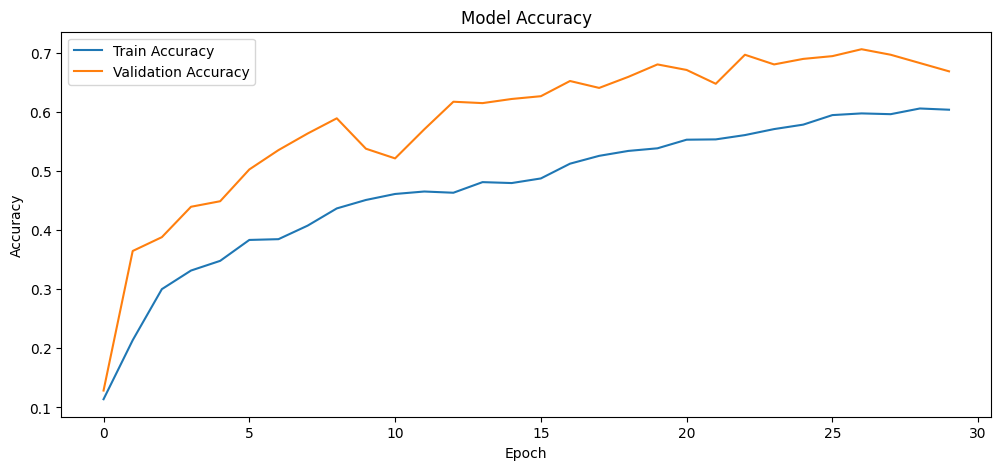

In [26]:
# Plotting model accuracy
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')

# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding legend
plt.legend(loc='upper left')

# Display the plot
plt.show()


**Observation:** number of epochs needs to be increased to improve the model accuracy on both training and validation dataset

In [27]:
# Evaluate the code on the test data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.0189 - accuracy: 0.6716 - 231ms/epoch - 15ms/step


**Observation:** These results indicate that the model achieved a test accuracy of 67.16%, and the evaluation process took 231 milliseconds per epoch with each step (batch) taking around 15 milliseconds

**Plotting the Confusion Matrix**

In [28]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)                          # Complete the code to predict the output probabilities

15/15 [==============================] - 1s 11ms/step


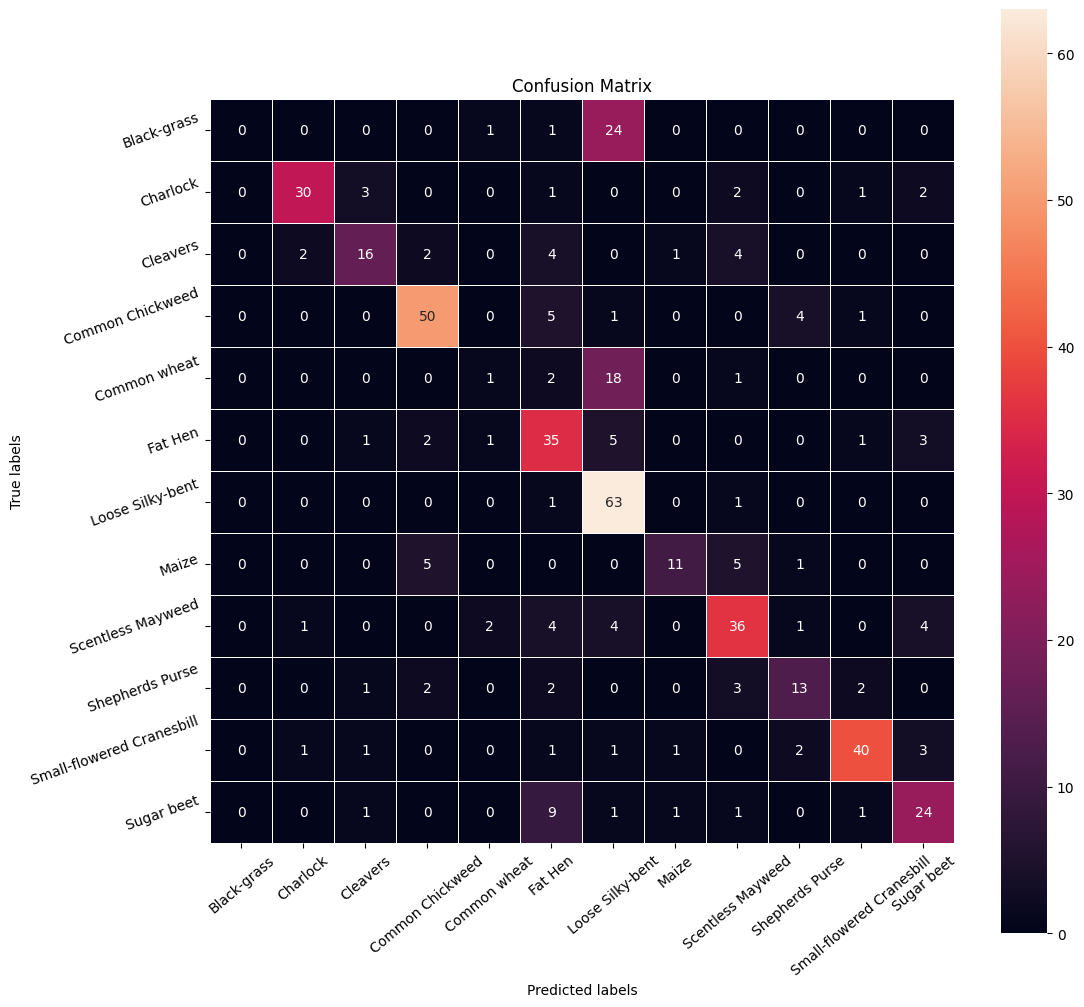

In [29]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)              # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observation:** Although the model works quite weel on some of the categories the error cases are still significant for a few ccategories. That tells the model improvement is required.

**Plotting Classification Report**

In [30]:
#from sklearn import metrics
from sklearn.metrics import classification_report

# Plotting the classification report
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.88      0.77      0.82        39
           2       0.70      0.55      0.62        29
           3       0.82      0.82      0.82        61
           4       0.20      0.05      0.07        22
           5       0.54      0.73      0.62        48
           6       0.54      0.97      0.69        65
           7       0.79      0.50      0.61        22
           8       0.68      0.69      0.69        52
           9       0.62      0.57      0.59        23
          10       0.87      0.80      0.83        50
          11       0.67      0.63      0.65        38

    accuracy                           0.67       475
   macro avg       0.61      0.59      0.58       475
weighted avg       0.64      0.67      0.64       475



**Observation:** For each class, precision, recall, and F1-score metrics are reported, along with the support (number of instances) in the test set. The overall accuracy of the model on the test set is 67%. The model demonstrates varying degrees of effectiveness across different classes, with some classes achieving high precision and recall, while others exhibit imbalances and challenges in prediction.


## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [31]:
# Set up a learning rate reduction callback based on validation accuracy
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [32]:
# Resetting the TensorFlow backend, fixing random seeds for reproducibility
from tensorflow.keras import backend
import random

backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [33]:
# Configure the training data generator with a rotation range of 20
train_datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

In [34]:
# Initializing a sequential model
model2 = Sequential()

# Adding the first convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation
# Input_shape denotes input image dimensions (64, 64, 3)
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first convolutional layer
model2.add(MaxPooling2D((2, 2), padding='same'))

# Adding another convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and ReLU activation
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling after the second convolutional layer
model2.add(MaxPooling2D((2, 2), padding='same'))

# Adding batch normalization for regularization
model2.add(BatchNormalization())

# Flattening the output of the convolutional layers
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons and ReLU activation
model2.add(Dense(16, activation='relu'))

# Adding dropout with a dropout rate of 0.3 for regularization
model2.add(Dropout(0.3))

# Adding the output layer with 12 neurons and softmax activation for multi-class classification
model2.add(Dense(12, activation='softmax'))

# Initializing the Adam optimizer
opt = Adam()

# Compiling the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

**Observation:**
The model consists of two convolutional layers with 64 and 32 filters, respectively, each followed by max-pooling layers to downsample the spatial dimensions. Batch normalization is employed to regularize the network. The flattened output is connected to a dense layer with 16 neurons and Rectified Linear Unit (ReLU) activation. A dropout layer with a dropout rate of 0.3 is added for regularization. The final layer is a dense layer with 12 neurons and softmax activation. The Adam optimizer is used with categorical cross-entropy as the loss function, and the model performance will be evaluated based on accuracy.

<b> Fitting the model on the train data

In [35]:
# Define the number of epochs and batch size
epochs = 30
batch_size = 64

# Fit the model on the training data using data augmentation
history = model2.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False),
    epochs=epochs,
    steps_per_epoch=len(X_train_normalized) // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]
)


Epoch 1/30
60/60 [==============================] - 7s 82ms/step - loss: 2.1315 - accuracy: 0.2437 - val_loss: 2.3934 - val_accuracy: 0.1519 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 6s 96ms/step - loss: 1.6844 - accuracy: 0.3997 - val_loss: 2.2806 - val_accuracy: 0.2196 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 69ms/step - loss: 1.5413 - accuracy: 0.4610 - val_loss: 2.2077 - val_accuracy: 0.2126 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 5s 80ms/step - loss: 1.4095 - accuracy: 0.5149 - val_loss: 2.0843 - val_accuracy: 0.4883 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 6s 92ms/step - loss: 1.3453 - accuracy: 0.5234 - val_loss: 1.8663 - val_accuracy: 0.4065 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 4s 70ms/step - loss: 1.1956 - accuracy: 0.5778 - val_loss: 1.7301 - val_accuracy: 0.5678 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 5s 82ms/step - loss: 1.1

**Model Evaluation**

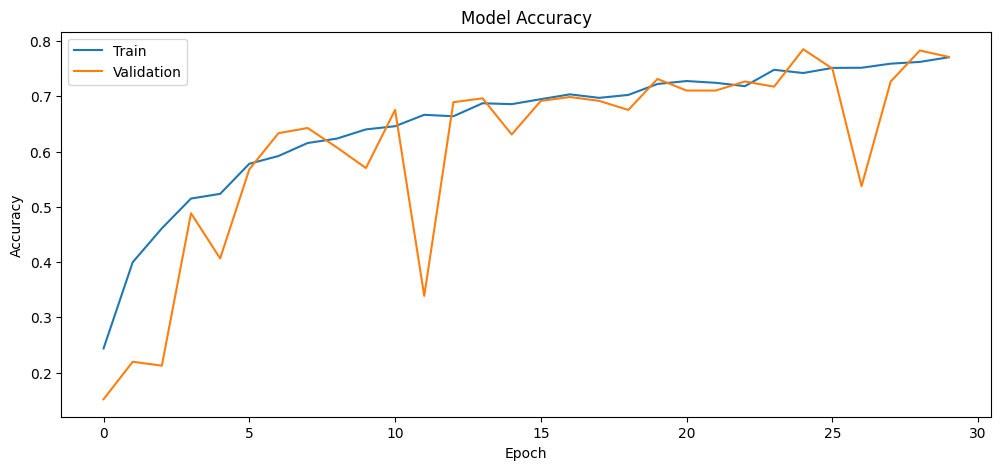

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation:** Accuracy in the training set did increase significantly.

**Evaluate the model on test data**

In [37]:
# Evaluate the model on the test data and get accuracy
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9033 - accuracy: 0.7305 - 179ms/epoch - 12ms/step


**Obsrvation:**
The model evaluation summary indicates that the NN achieved a test accuracy of 73.05%, with a corresponding loss of 0.9033. The evaluation process took a total of 5.4 seconds, with an average time of 12 milliseconds per step.

**Plotting the Confusion Matrix**

In [38]:
# Obtain the output probabilities
y_pred = model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


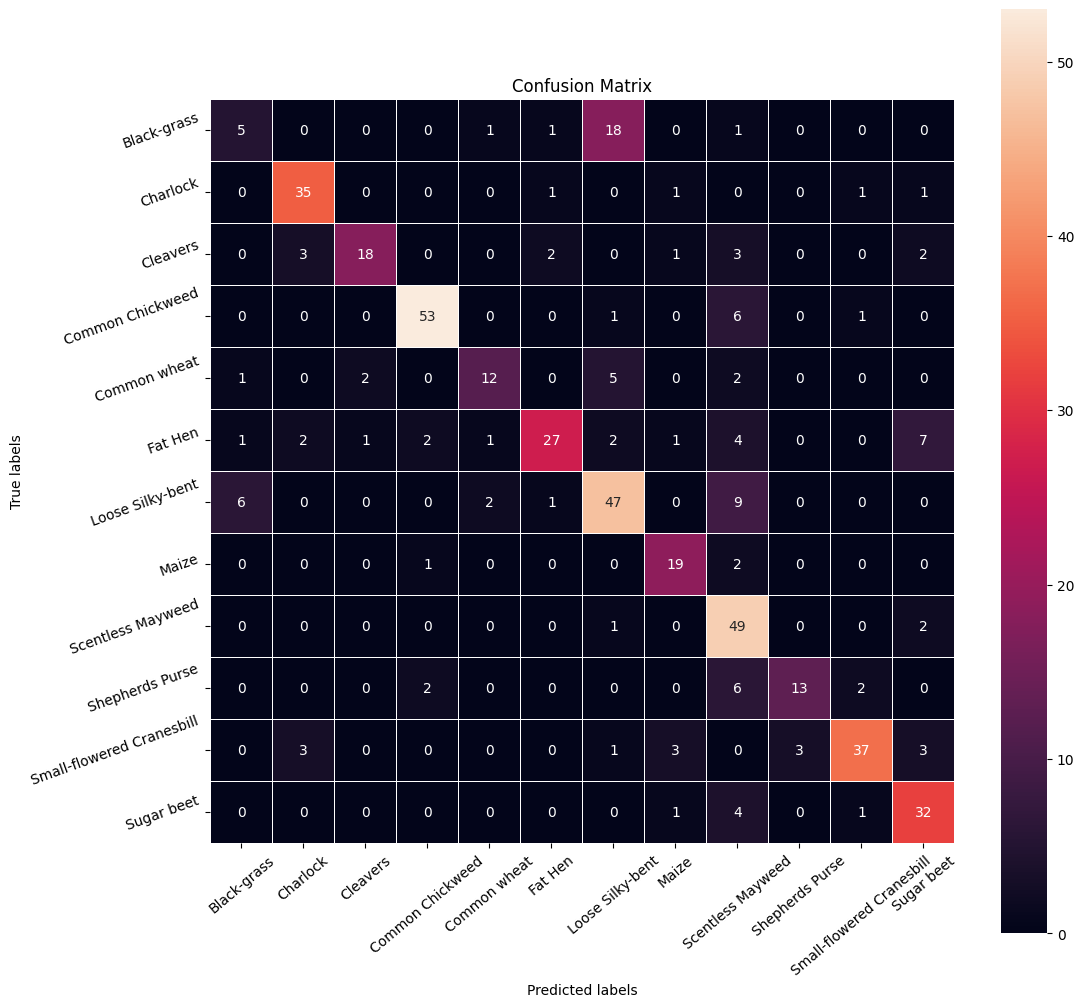

In [39]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observation:** The model is imporoved slightly but not the best possible model. Still number of misclassification is shown in the confusion matrix.

**Plotting Classification Report**

In [40]:
# Taking y_test_arg and y_pred_arg as the actual and predicted labels
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.38      0.19      0.26        26
           1       0.81      0.90      0.85        39
           2       0.86      0.62      0.72        29
           3       0.91      0.87      0.89        61
           4       0.75      0.55      0.63        22
           5       0.84      0.56      0.68        48
           6       0.63      0.72      0.67        65
           7       0.73      0.86      0.79        22
           8       0.57      0.94      0.71        52
           9       0.81      0.57      0.67        23
          10       0.88      0.74      0.80        50
          11       0.68      0.84      0.75        38

    accuracy                           0.73       475
   macro avg       0.74      0.70      0.70       475
weighted avg       0.75      0.73      0.72       475



**Observation:** In conclusion, the classification report demonstrates a notable level of performance across various metrics for the evaluated classes. While precision, recall, and F1-score vary for each class, the overall accuracy stands at 73%. The model exhibits solid predictive capabilities, especially in distinguishing classes 1, 3, and 10, where precision and recall are notably high. Some variability is observed across other classes, indicating potential areas for refinement.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [41]:
# Model architecture changed be inserting batchnormalisation into the Conv2D
model_improved = Sequential()

model_improved.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(64, 64, 3),
            activation='relu'))
model_improved.add(BatchNormalization())   # This normalises the outputs of the first convolutional layer before doing the second
model_improved.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_improved.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_improved.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_improved.add(Flatten())
model_improved.add(Dense(256, activation='relu'))  # Dense layer size increased
model_improved.add(Dense(12, activation='softmax'))

# Configure the learning process
# The loss function is the objective that the model will try to minimize
# For any classification problem, use accuracy metric

optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
model_improved.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model_improved.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_2 (Bat  (None, 60, 60, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                      

<b> Fitting the final model on the train data

In [42]:
# Define the number of epochs and batch size
epochs = 60 # doubled
batch_size = 64

# Fit the model on the training data using data augmentation
history = model_improved.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False),
    epochs=epochs,
    steps_per_epoch=len(X_train_normalized) // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

Epoch 1/60
60/60 [==============================] - 11s 106ms/step - loss: 2.3728 - accuracy: 0.2802 - val_loss: 2.5061 - val_accuracy: 0.1379 - lr: 0.0020
Epoch 2/60
60/60 [==============================] - 5s 90ms/step - loss: 1.3017 - accuracy: 0.5712 - val_loss: 2.9602 - val_accuracy: 0.1379 - lr: 0.0020
Epoch 3/60
60/60 [==============================] - 5s 77ms/step - loss: 0.9380 - accuracy: 0.6926 - val_loss: 3.7625 - val_accuracy: 0.1379 - lr: 0.0020
Epoch 4/60
60/60 [==============================] - ETA: 0s - loss: 0.7756 - accuracy: 0.7457
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
60/60 [==============================] - 7s 111ms/step - loss: 0.7756 - accuracy: 0.7457 - val_loss: 4.7870 - val_accuracy: 0.1379 - lr: 0.0020
Epoch 5/60
60/60 [==============================] - 5s 77ms/step - loss: 0.5670 - accuracy: 0.8226 - val_loss: 4.9363 - val_accuracy: 0.1355 - lr: 0.0010
Epoch 6/60
60/60 [==============================] - 5s 77ms/step - l

**Final Model Evaluation**

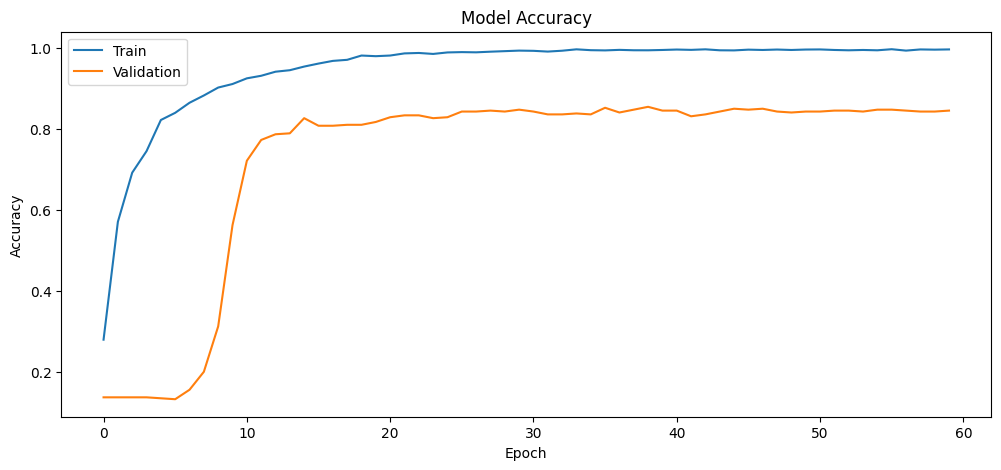

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation:** Accuracy of training set increased significantly and becomes constant after 30 epochs meaning the increase in the number of epochs was not helpful. The validation set accuracy is also acceptably high enough to wrap up the modelling.

**Evaluate the final model on test data**

In [44]:
# Evaluate the model on the test data and get accuracy
accuracy = model_improved.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5807 - accuracy: 0.8316 - 296ms/epoch - 20ms/step


**Obsrvation:**
The model evaluation summary indicates that the NN achieved a test accuracy of 83.16%, with a corresponding loss of 0.9033. The evaluation process took a total of 17.8 seconds, with an average time of 20 milliseconds per step.

**Plotting the Confusion Matrix for the final model**

In [45]:
# Obtain the output probabilities
y_pred = model_improved.predict(X_test_normalized)

15/15 [==============================] - 0s 5ms/step


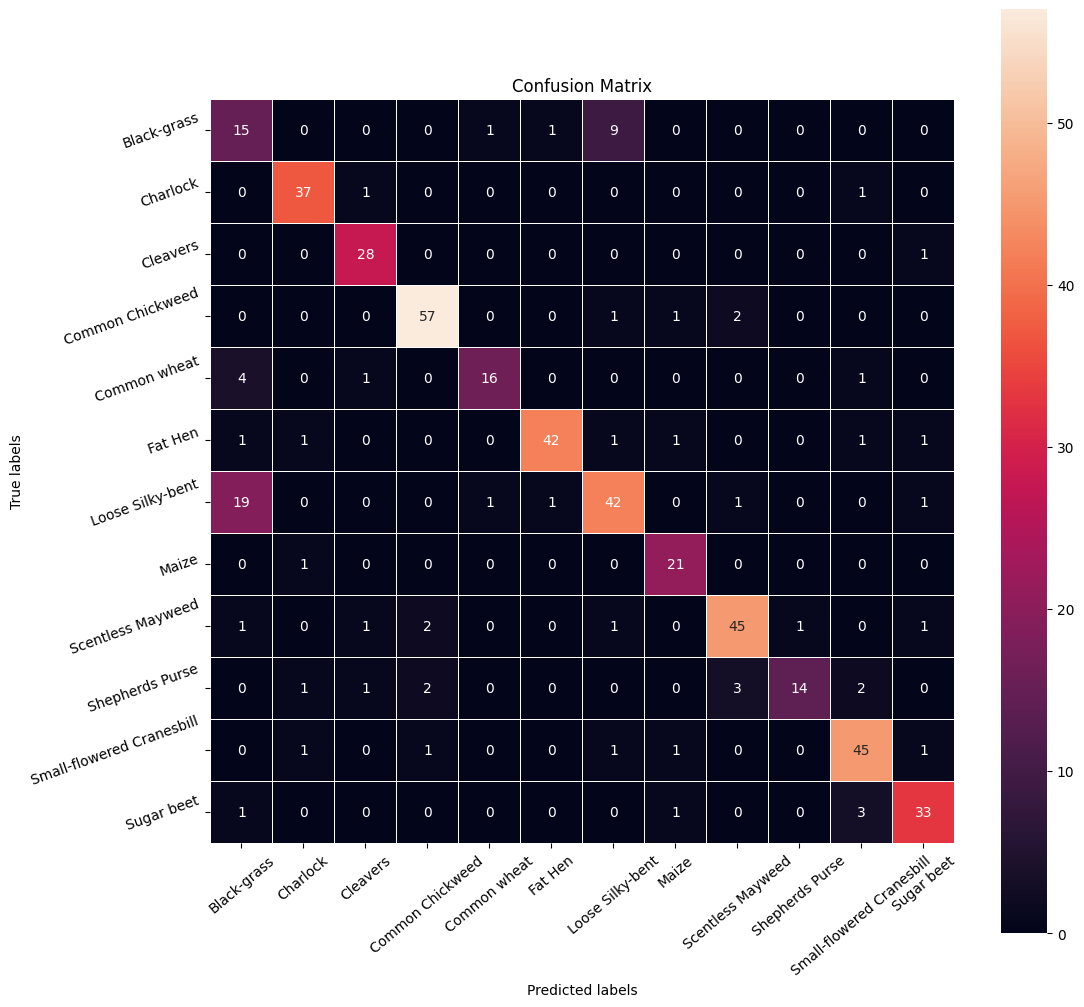

In [46]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observation:** The model is imporoved by a large margin.

### Visualizing the prediction

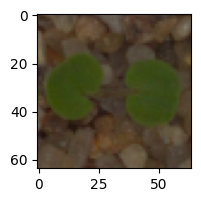

1/1 [==============================] - 0s 179ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill


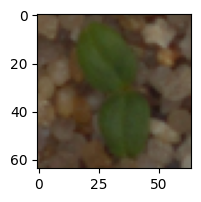

1/1 [==============================] - 0s 18ms/step
Predicted Label: ['Cleavers']
True Label: Cleavers


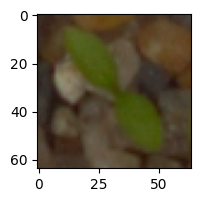

1/1 [==============================] - 0s 17ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed


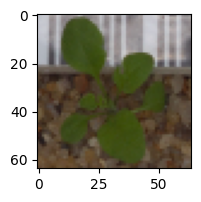

1/1 [==============================] - 0s 22ms/step
Predicted Label: ['Shepherds Purse']
True Label: Shepherds Purse


In [47]:
# Predictions for the first image
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
predicted_label = enc.inverse_transform(model_improved.predict(X_test_normalized[2].reshape(1, 64, 64, 3)))
true_label = enc.inverse_transform(y_test_encoded)[2]
print('Predicted Label:', predicted_label)
print('True Label:', true_label)

# Predictions for the second image
plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
predicted_label = enc.inverse_transform(model_improved.predict(X_test_normalized[33].reshape(1, 64, 64, 3)))
true_label = enc.inverse_transform(y_test_encoded)[33]
print('Predicted Label:', predicted_label)
print('True Label:', true_label)

# Predictions for the third image
plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
predicted_label = enc.inverse_transform(model_improved.predict(X_test_normalized[59].reshape(1, 64, 64, 3)))
true_label = enc.inverse_transform(y_test_encoded)[59]
print('Predicted Label:', predicted_label)
print('True Label:', true_label)

# Predictions for the fourth image
plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
predicted_label = enc.inverse_transform(model_improved.predict(X_test_normalized[36].reshape(1, 64, 64, 3)))
true_label = enc.inverse_transform(y_test_encoded)[36]
print('Predicted Label:', predicted_label)
print('True Label:', true_label)


**Observation:** The sampled pictures are all predicted correctly by the final model.

## Actionable Insights and Business Recommendations

* Implementing the Batch Normalization technique between convolutional layers proved instrumental in achieving a notable increase in accuracy and a reduction in false predictions. This suggests that a potential source of error could be attributed to background patterns, which may have received undue emphasis during the modeling process. Hence, employing a consistent background could potentially enhance prediction outcomes.

* The "Loose Silky Bent" category exhibited the highest misclassification rate compared to others. This is likely due to the plant's diminutive size and string-like structure, necessitating higher resolution and contrast. The application of a Gaussian kernel might enhance the accuracy of this specific category.

* A hypothesis worth exploring is the association of the green color with the plant in all images. Adjusting the weight values in the G layer of the input information could potentially yield improved predictive results.

* Tailoring the image capture approach by using closer shots for tiny plants and wider shots for those with spread leaves could enhance model performance.

* Including any symmetrical patterns present in the plant during the image capture process is expected to contribute positively to the learning process.

_____